<h3>Alcances del proyecto</h3>
<p>En este proyecto voy a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, con el fin de responder las siguientes preguntas: </p>
<ul>
<li>¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>¿Hay grandes variaciones en ventas a lo largo del mes?</li>
<li>¿Quiénes son los mejores vendedores teniendo en cuenta el país que más compras realiza?</li>
<li>Comparar las ventas de los países que conforman el mercosur.</li>
</ul>
<p>Para este proyecto utilizaré herramientas de Pandas para análisis exploratorio y Matplotlib/Seaborn para visualización de resultados.</p>

<h4>Fuentes de datos</h4>
<ul>
<li>articles.db: BD con datos de los artículos.</li>
<li>sellers.xlsx: datos de los vendedores.</li>
<li>orders.csv: registro de las ventas de un mes.</li>
</ul>

In [1]:
# imports
!pip install openpyxl==3.0.10
import numpy as np
import pandas as pd
import sqlite3 as sql3
import openpyxl # levantar excel
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Cargo los datos en 3 diferentes dataframes

# Artículos
conn = sql3.connect('/Data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price'])

# Vendedores
df_sellers =  pd.read_excel('/Data/sellers.xlsx', index_col=0)

# Órdenes
df_orders = pd.read_csv('/Data/orders.csv')

<h2>Explorar y preparar los datos</h2>


In [3]:
# Exploración del df de artículos
print('Muestra de datos')
print(df_articles.head())
print('\nFormato del dataframe')
print(df_articles.shape)
print('\nBúsqueda de valores null por columna')
print(df_articles.isnull().sum())
print('\nFormato de los datos por columna')
print(df_articles.dtypes)

Muestra de datos
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Formato del dataframe
(31, 3)

Búsqueda de valores null por columna
article_id      0
article_name    0
unit_price      0
dtype: int64

Formato de los datos por columna
article_id       int64
article_name    object
unit_price      object
dtype: object


In [4]:
# Exploración del df de vendedores
print('Muestra de datos')
print(df_sellers.head())
print('\nFormato del dataframe')
print(df_sellers.shape)
print('\nBúsqueda de valores null por columna')
print(df_sellers.isnull().sum())
print('\nFormato de los datos por columna')
print(df_sellers.dtypes)

Muestra de datos
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Formato del dataframe
(15, 1)

Búsqueda de valores null por columna
seller_name    0
dtype: int64

Formato de los datos por columna
seller_name    object
dtype: object


In [5]:
# Exploración del df de órdenes
print('Muestra de datos')
print(df_orders.head())
print('\nFormato del dataframe')
print(df_orders.shape)
print('\nBúsqueda de valores null por columna')
print(df_orders.isnull().sum())
print('\nFormato de los datos por columna')
print(df_orders.dtypes)

Muestra de datos
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Formato del dataframe
(1000, 6)

Búsqueda de valores null por columna
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Formato de los datos por columna
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


In [6]:
# El precio de los artículos en la tabla 'articles' es de tipo object, lo transformo a float

df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)

article_id        int64
article_name     object
unit_price      float64
dtype: object


In [7]:
# Defino el modelo de datos creando un nuevo dataframe a partir de las fuentes de datos proporcionados

df = df_orders.join(df_articles.set_index('article_id'), on='article_id')
df = df.join(df_sellers.set_index(df_sellers.index), on='seller_id')

# Agrego una nueva columna
df['total_amount'] = df.unit_price * df.quantity
# Saco las columnas de id de cada tabla
df.drop(['order_id', 'article_id', 'seller_id'], axis='columns', inplace=True)
print(df.head(5))

   week  quantity country_name   article_name  unit_price      seller_name  \
0     1        10         Peru  Water Cooling        67.5  Cirilo Grandham   
1     1        15         Peru          Mouse        30.3      Ewell Peres   
2     1         5      Bolivia        Netbook       145.0   Janel O'Curran   
3     1         9       Brazil         Tablet       130.0   Janel O'Curran   
4     1         6       Mexico           Case        37.9  Daisie Slograve   

   total_amount  
0         675.0  
1         454.5  
2         725.0  
3        1170.0  
4         227.4  


<h2>Responder las preguntas</h2>


<h3>1. ¿Cuál es el artículo más vendido? (en unidades)</h3>

El artículo más vendido es "HDD" con una cantidad de "413"



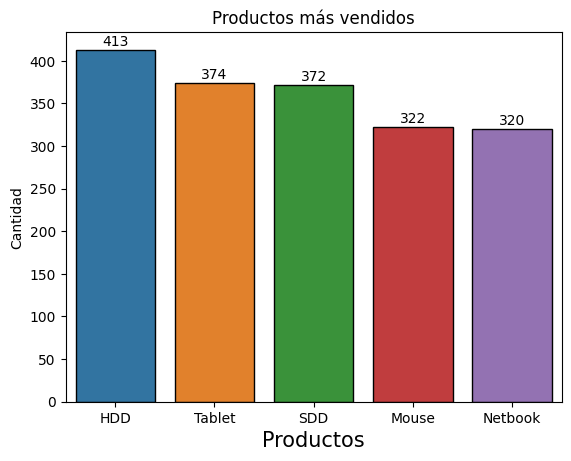

In [8]:
df1 = df.groupby(by='article_name').sum(numeric_only=True).sort_values('quantity', ascending=False)
# print(df1.quantity)

print(f'El artículo más vendido es "{df1.quantity.index[0]}" con una cantidad de "{df1.quantity[0]}"')
print()

graf = sns.barplot(data = df1.iloc[0:5], x=df1.iloc[0:5].index, y='quantity', palette='tab10', edgecolor='black')
graf.set_title('Productos más vendidos')
graf.set_xlabel('Productos', fontsize=15)
graf.set_ylabel('Cantidad')

for i in graf.patches:
    graf.annotate(text=int(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()+5), ha='center')

plt.show()

<h3>2. ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

El artículo que más ingresos proporcionó es "Full Pc" con una cantidad de "$538335.93"



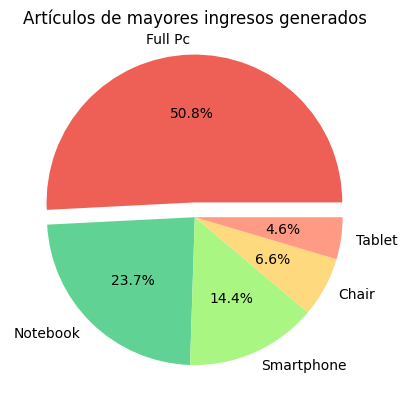

In [9]:
df2 = df1.sort_values('total_amount', ascending=False)

print(f'El artículo que más ingresos proporcionó es "{df2.quantity.index[0]}" con una cantidad de "${round(df2.total_amount[0],2)}"')
print()

colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(x=df2['total_amount'][0:5], labels=df2.index[0:5], autopct = '%1.1f%%', explode = [0.1,0,0,0,0], colors=colores)

plt.title('Artículos de mayores ingresos generados', fontsize=12)
plt.show()

<h3>3. ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

El bono a mejor vendedor del mes debe otorgarse a "Janel O'Curran" con una recaudación de "$192832.47"



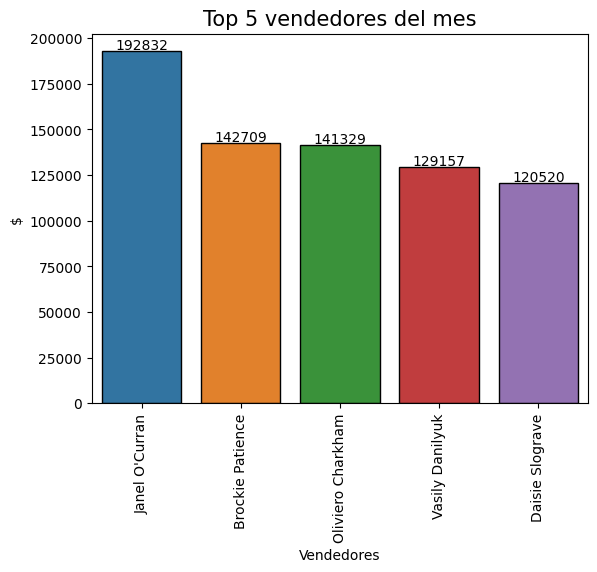

In [10]:
df3 = df.groupby(by='seller_name').sum(numeric_only=True).sort_values('total_amount', ascending=False)

print(f'El bono a mejor vendedor del mes debe otorgarse a "{df3.index[0]}" con una recaudación de "${round(df3.total_amount[0],2)}"')
print()

graf = sns.barplot(data = df3.iloc[0:5], x=df3.iloc[0:5].index, y='total_amount', palette='tab10', edgecolor='black')
graf.set_title('Top 5 vendedores del mes', fontsize=15)
graf.set_xlabel('Vendedores')
graf.set_ylabel('$')
plt.xticks(rotation=90)

for i in graf.patches:
    graf.annotate(text=int(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()+1000), ha='center')

plt.show()

<h3>4. ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>


      quantity  unit_price  total_amount
week                                    
1         2449    66048.67     507458.81
2         2444    48790.30     415364.44
3         2114    45563.76     329140.03
4         1058    24978.02     223844.56

Las ventas se reducen progresivamente desde el principio de mes hacia el final



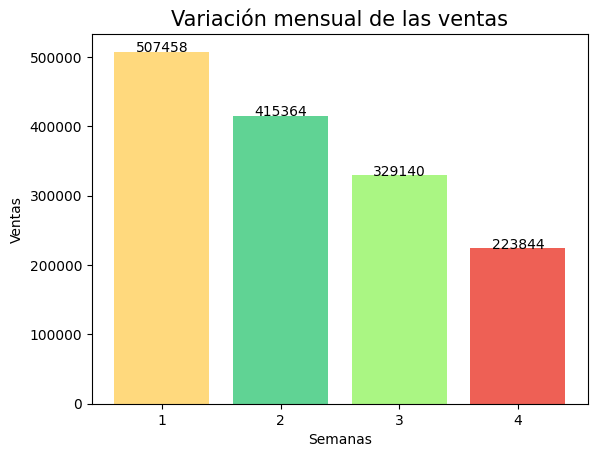

In [11]:
df4 = df.groupby(by='week').sum(numeric_only=True).sort_values('total_amount', ascending=False)
print(df4)
print()
print('Las ventas se reducen progresivamente desde el principio de mes hacia el final')
print()

fig = plt.figure()
ax = fig.add_subplot()

colores = ["#FFD97D","#60D394","#AAF683","#EE6055"]

plt.bar(df4.index, df4['total_amount'], color=colores)
ax.xaxis.set_major_locator(tick.MultipleLocator(1))

for i in ax.patches:
    ax.annotate(text=int(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()), ha='center')

plt.title('Variación mensual de las ventas', fontsize=15)
plt.xlabel('Semanas')
plt.ylabel('Ventas')

plt.show()

<h3>5. ¿Quiénes son los mejores vendedores teniendo en cuenta el país que más compras realiza?</h3>

country_name
Brazil       441271.85
Argentina    205832.78
Colombia     177514.29
Name: total_amount, dtype: float64

Teniendo en cuenta que Brazil es el país que más compras realiza, los mejores vendedores son: 

seller_name
Daisie Slograve     65283.28
Aveline Swanwick    58771.48
Arnold Kilkenny     47243.54
Kati Innot          32087.32
Tobin Roselli       31997.93
Name: total_amount, dtype: float64



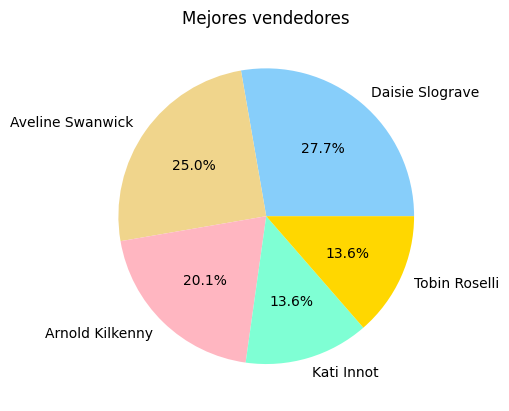

In [12]:
df5_country = df.groupby(by='country_name').sum(numeric_only=True).sort_values('total_amount', ascending=False)
print(df5_country['total_amount'].head(3))
print()

df5_sellers = df[df['country_name']=='Brazil']

df5_sellers = df5_sellers.groupby(by='seller_name').sum(numeric_only=True).sort_values('total_amount', ascending=False)
print(f'Teniendo en cuenta que Brazil es el país que más compras realiza, los mejores vendedores son: ')
print()
print(df5_sellers['total_amount'].head())
print()

colores = ["#87CEFA","#F0D58C","#FFB6C1","#7FFFD4","#FFD700"]
plt.pie(x=df5_sellers['total_amount'][0:5], labels=df5_sellers.index[0:5], autopct = '%1.1f%%', colors=colores)

plt.title('Mejores vendedores', fontsize=12)
plt.show()

<h3>6. Comparar las ventas de los países que conforman el mercosur</h3>

Ventas totales del mercosur: $673142.84

country_name
Brazil       441271.85
Argentina    205832.78
Uruguay       17843.09
Paraguay       8195.12
Name: total_amount, dtype: float64



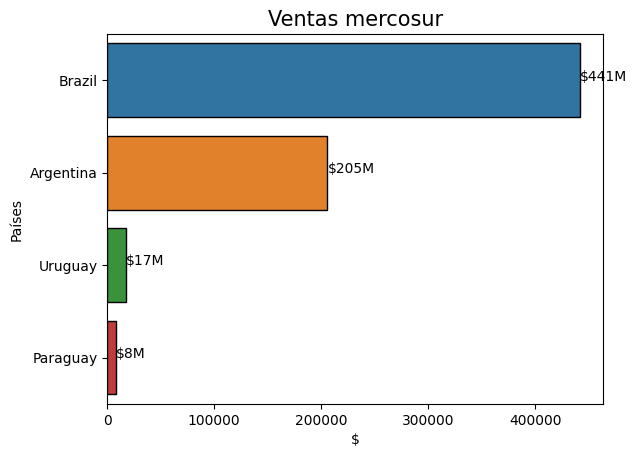

In [13]:
df_6 = df[df.country_name.isin(['Argentina', 'Brazil', 'Paraguay','Uruguay'])].copy()

print(f'Ventas totales del mercosur: ${round(df_6.total_amount.sum(),2)}')
print()
df_6 = df_6.groupby(by='country_name').sum(numeric_only=True).sort_values('total_amount', ascending=False)
print(df_6['total_amount'])
print()

graf = sns.barplot(data=df_6, x='total_amount', y=df_6.index, palette='tab10', edgecolor='black')

graf.set_title('Ventas mercosur', fontsize=15)
graf.set_xlabel('$')
graf.set_ylabel('Países')

for i in graf.patches:
    graf.annotate(text=f'${int(i.get_width()/1000)}M', xy=(i.get_x()+i.get_width(), i.get_y()+i.get_height()/2),ha='left')

plt.show()